In [9]:
import numpy as np
import os
import torch
from torch.optim import Adam
from torchvision import models, datasets, transforms
from network import Autoencoder, Conv_Autoencoder, add_white_noise
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim



# Task 1

Epoch [1/50], Training Loss: 0.1608
Epoch [2/50], Training Loss: 0.1060
Epoch [3/50], Training Loss: 0.1001
Epoch [4/50], Training Loss: 0.0972
Epoch [5/50], Training Loss: 0.0951
Epoch [6/50], Training Loss: 0.0935
Epoch [7/50], Training Loss: 0.0921
Epoch [8/50], Training Loss: 0.0912
Epoch [9/50], Training Loss: 0.0903
Epoch [10/50], Training Loss: 0.0897
Epoch [10/50], Test Loss: 0.0900
Epoch [11/50], Training Loss: 0.0890
Epoch [12/50], Training Loss: 0.0885
Epoch [13/50], Training Loss: 0.0881
Epoch [14/50], Training Loss: 0.0877
Epoch [15/50], Training Loss: 0.0874
Epoch [16/50], Training Loss: 0.0870
Epoch [17/50], Training Loss: 0.0868
Epoch [18/50], Training Loss: 0.0867
Epoch [19/50], Training Loss: 0.0864
Epoch [20/50], Training Loss: 0.0861
Epoch [20/50], Test Loss: 0.0871
Epoch [21/50], Training Loss: 0.0859
Epoch [22/50], Training Loss: 0.0856
Epoch [23/50], Training Loss: 0.0853
Epoch [24/50], Training Loss: 0.0852
Epoch [25/50], Training Loss: 0.0850
Epoch [26/50], Tra

ValueError: x and y must have same first dimension, but have shapes (50,) and (5,)

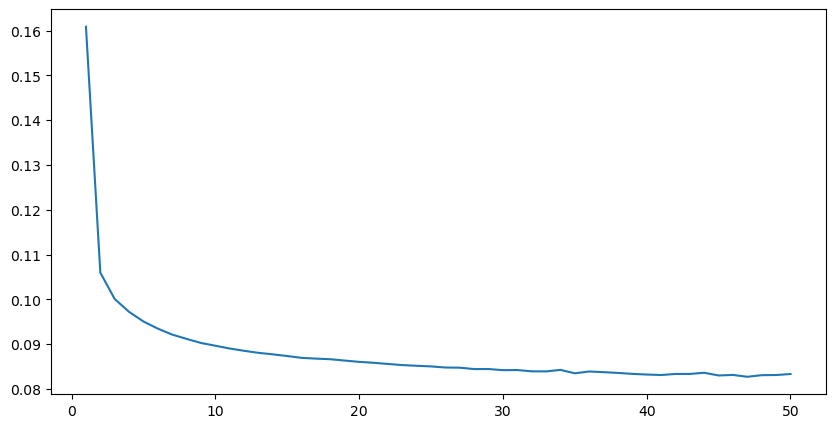

In [12]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion NIST data has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1)  # Flatten the images
                output = autoencoder(img)
                loss = criterion(output, img)
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')


# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()        

# Task 2

In [6]:
# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        noisy_img = add_white_noise(img)       # Add noise to the images
        output = autoencoder(noisy_img)
        loss = criterion(output, img)    # Compute loss with respect to original images
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1)  # Flatten the images
                noisy_img = add_white_noise(img)       # Add noise to the images
                output = autoencoder(noisy_img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

Epoch [1/50], Training Loss: 0.0687
Epoch [2/50], Training Loss: 0.0679
Epoch [3/50], Training Loss: 0.0677
Epoch [4/50], Training Loss: 0.0675
Epoch [5/50], Training Loss: 0.0673
Epoch [6/50], Training Loss: 0.0672
Epoch [7/50], Training Loss: 0.0669
Epoch [8/50], Training Loss: 0.0663
Epoch [9/50], Training Loss: 0.0660
Epoch [10/50], Training Loss: 0.0656
Epoch [10/50], Test Loss: 0.0663
Epoch [11/50], Training Loss: 0.0654
Epoch [12/50], Training Loss: 0.0652
Epoch [13/50], Training Loss: 0.0649
Epoch [14/50], Training Loss: 0.0648
Epoch [15/50], Training Loss: 0.0645
Epoch [16/50], Training Loss: 0.0644
Epoch [17/50], Training Loss: 0.0643
Epoch [18/50], Training Loss: 0.0642
Epoch [19/50], Training Loss: 0.0641
Epoch [20/50], Training Loss: 0.0640
Epoch [20/50], Test Loss: 0.0646
Epoch [21/50], Training Loss: 0.0640
Epoch [22/50], Training Loss: 0.0638
Epoch [23/50], Training Loss: 0.0637
Epoch [24/50], Training Loss: 0.0637
Epoch [25/50], Training Loss: 0.0636
Epoch [26/50], Tra

# Task 3

In [11]:
# Data loading and transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Model, loss function, and optimizer
autoencoder = Conv_Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)

# Number of epochs
num_epochs = 50

ValueError: optimizer got an empty parameter list